In [19]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
dataframe = pd.read_csv('intOutput.csv') #create a dataframe for the input file

In [21]:
dataframe.describe() # display statistics information about the data file

,energy_sum,group_average,energy_average,tariff_types,acorn_types
count,5536.000000,5536.000000,5536.000000,5536.000000,5536.000000
mean,6410.524974,10.175732,10.175732,0.202132,8.673049
std,4754.474818,2.188564,7.391747,0.401626,4.866793
min,0.000000,6.407015,0.000000,0.000000,0.000000
25%,3309.957750,9.167381,5.374066,0.000000,5.000000
50%,5234.129999,10.291067,8.316200,0.000000,6.000000
75%,8124.640749,10.291067,12.822510,0.000000,12.000000
max,65623.649000,19.216641,101.115022,1.000000,18.000000


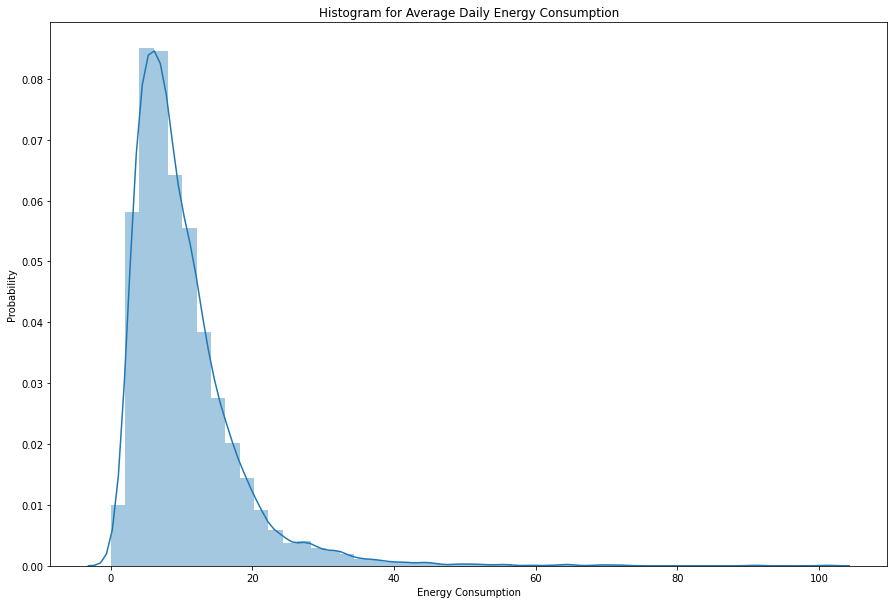

In [22]:
plt.figure(figsize = (15,10)) # plot the histogram for the data
plt.tight_layout()
seabornInstance.distplot(dataframe['energy_average']) # show average daily engergy consumption
plt.title('Histogram for Average Daily Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Probability')
plt.show()

In [23]:
x = dataframe[['acorn_types', 'tariff_types']].values # input acorn types and tariff types numeric data into x values
y = dataframe['energy_average'].values # average daily energy consumption as the y values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) # 80% for train data and 20% for test data

In [24]:
regressor = LinearRegression().fit(x_train,y_train) # fitting a linear regression model
print('Intercept = ', regressor.intercept_)
print('Coefficient for Acorn Types = ', regressor.coef_[0])
print('Coefficient for Tariff Types = ', regressor.coef_[1]) # display information for the regression line

Intercept =  12.813098166961058
Coefficient for Acorn Types =  -0.28282077218214713
Coefficient for Tariff Types =  -0.9957565929732806


In [10]:
y_pred = regressor.predict(x_test) # make predictions for the test data to see the results
dataframe1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) # make a dataframe to see the difference of actual and predicted data
dataframe1

,Actual,Predicted
0,12.187364,12.530277
1,12.747934,10.120417
2,11.448270,11.681815
3,3.330599,9.136428
4,5.736595,8.287966
...,...,...
1103,3.402794,11.398994
1104,7.579990,9.702070
1105,13.057939,11.398994
1106,1.962596,8.005145


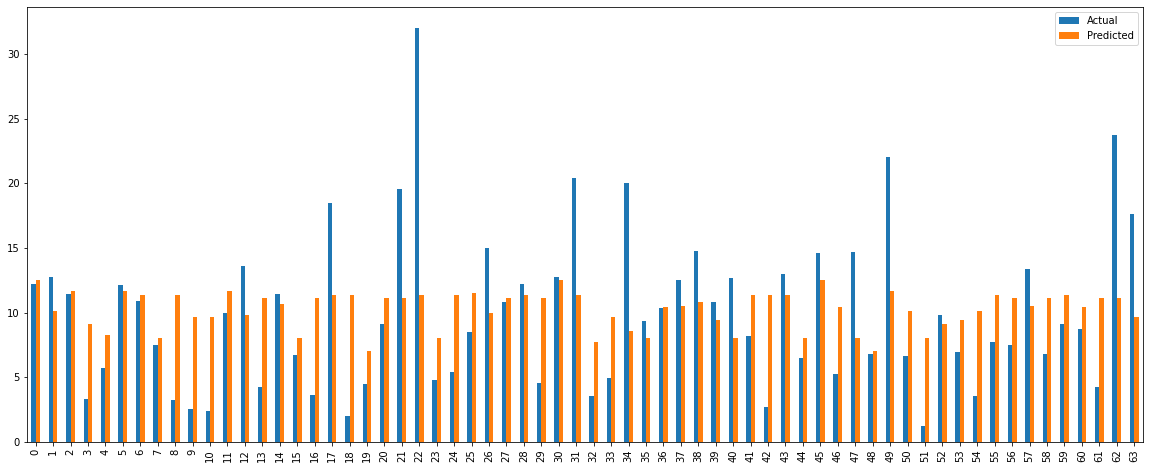

In [25]:
dataframe2 = dataframe1.head(64) # print out the 64 data to visualize the result
dataframe2.plot(kind = 'bar', figsize = (20,8)) # plot the result
plt.show()

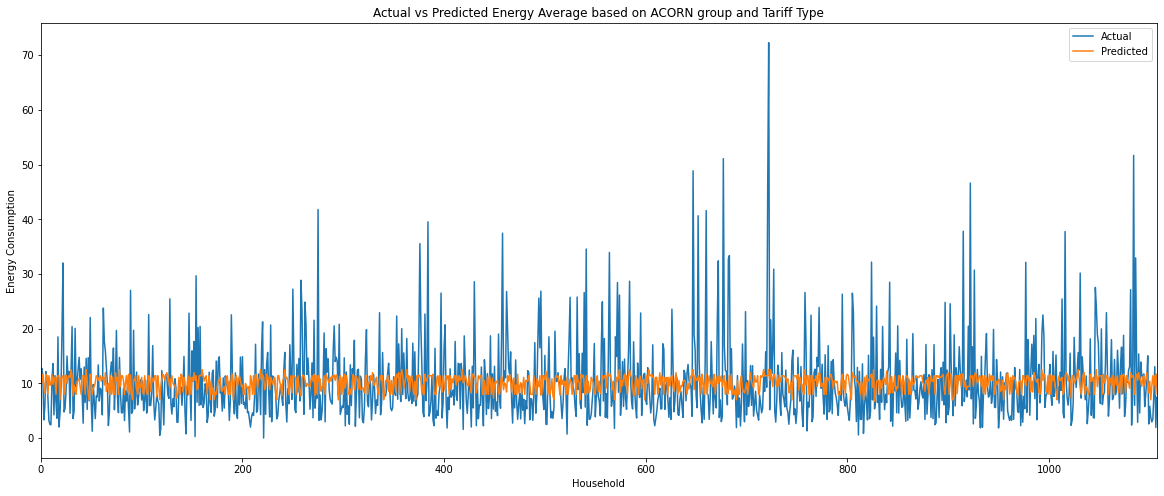

In [27]:
dataframe1.plot(figsize = (20,8)) # plot all the data to visualize the different between actual and predicted data
plt.title('Actual vs Predicted Energy Average based on ACORN group and Tariff Type')
plt.xlabel('Household')
plt.ylabel('Energy Consumption')
plt.show()

In [12]:
#statistics of energy average: mean = 10.1757, range = [0, 101.115], std = 7.3917
# print statistics information about the model's performance
print('R2 coefficient: ', metrics.r2_score(y_test, y_pred)) # Higher = better
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #lower = better 
print('NRMSE: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(101.115))

R2 coefficient:  0.05522760600452681
Mean Absolute Error:  4.943243057490394
Mean Squared Error:  49.97461952840958
Root Mean Squared Error:  7.069272913702624
NRMSE:  0.06991319699058125
